# Football Players' Transfer Fee Prediction Model

The football players' transfer fee report provides valuable insights into the financial landscape of the football industry.
Understanding the trends and challenges in player transfers can assist clubs in making informed decisions
for future transfer windows.

# Mission and Vision

This dataset is undertaken to  craete a predictive model for the transfer values of football players. I will utilize data
from football Players and construct a model to predict transfer fees based on that data

# About Dataset

Player data includes basic information such as age, height, playing position, as well as professional statistics such as 
goal scoring, assists(in 2 season 2021-2022 and 2022-2023),injuries, along with total individual and team awards in their 
carrier.

Information was gathered on players competing in several top-tier global football leagues:
1.European leagues
2.American leagues
3.African Leagues
4.Asian Leagues

for the position encoded
* 1----Goalkeeping Position['Goal Keeper']


* 2----Defending Position including ['Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back'and 'Defender'] 
       
       
* 3----Midfield Position including [ 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield''midfield-RightMidfield', 'midfield-LeftMidfield'
       and 'midfield']
       
       
* 4-----Attacking Position including ['Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward'
         'Attack-SecondStriker'and 'Attack']
         
 
 
I got this dataset from kaggle.com and i am going to use this for my Project


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance

In [2]:
# Load data
df=pd.read_csv('final_data.csv')
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [3]:
# renaming column
df.rename(columns={'minutes played': 'minutes_played'}, inplace=True)
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes_played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [5]:
# checking for missing values
print(df.isnull().sum())

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes_played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64


###### All Variables look great with no missing data

In [6]:
# finding the observations and features of the data
df.shape

print(f'The data set has {df.shape[0]} observations and {df.shape[1]} variables')

The data set has 10754 observations and 22 variables


# Exploratory Data Analysis [EDA]

In [7]:
# Unique teams in the team variable
df.team.unique()

array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton &amp; Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',

In [8]:
# finding the number of teams in the dataset
nu_teams=df.team.nunique()
nu_teams

374

In [9]:
print(f'The nuber of unique teams is:  {nu_teams}')

The nuber of unique teams is:  374


Text(0.5, 1.0, 'Distribution of first[sorted] 10 teams')

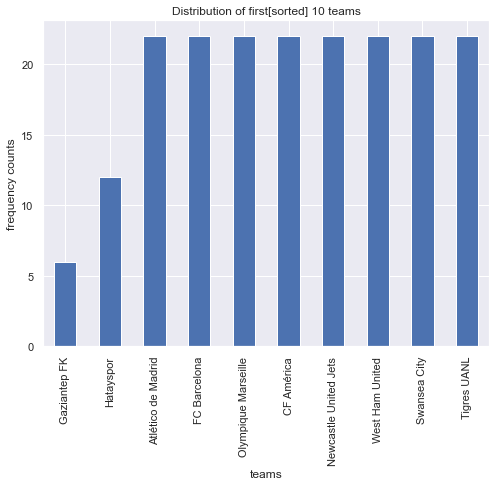

In [10]:
# Number of Players in a team
team_val_counts=df.team.value_counts().sort_values()
sns.set(rc={'figure.figsize':(8,6)})
team_val_counts.head(10).plot.bar()
plt.xlabel('teams')
plt.ylabel('frequency counts')
plt.title('Distribution of first[sorted] 10 teams')

Text(0.5, 1.0, 'Distribution of last[sorted] 10 teams')

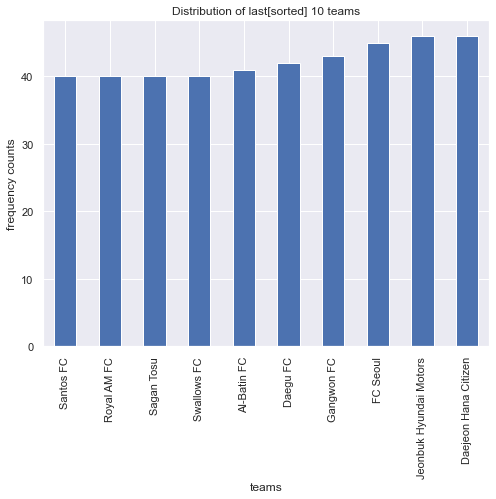

In [11]:
# Nuber of Players in a team
team_val_counts.tail(10).plot.bar()
plt.xlabel('teams')
plt.ylabel('frequency counts')
plt.title('Distribution of last[sorted] 10 teams')

In [12]:
# unique positions for postion variable
df.position.unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [13]:
# Number of Players in a particular Position
df.position.value_counts().sort_values()

Defender                        33
Attack                          53
Attack-SecondStriker            65
midfield                        75
midfield-LeftMidfield          100
midfield-RightMidfield         102
Attack-LeftWinger              714
Attack-RightWinger             717
midfield-AttackingMidfield     769
Defender Left-Back             807
Defender Right-Back            867
midfield-DefensiveMidfield     900
midfield-CentralMidfield      1149
Goalkeeper                    1229
Attack Centre-Forward         1353
Defender Centre-Back          1821
Name: position, dtype: int64

Text(0.5, 1.0, 'Distribution of Positions')

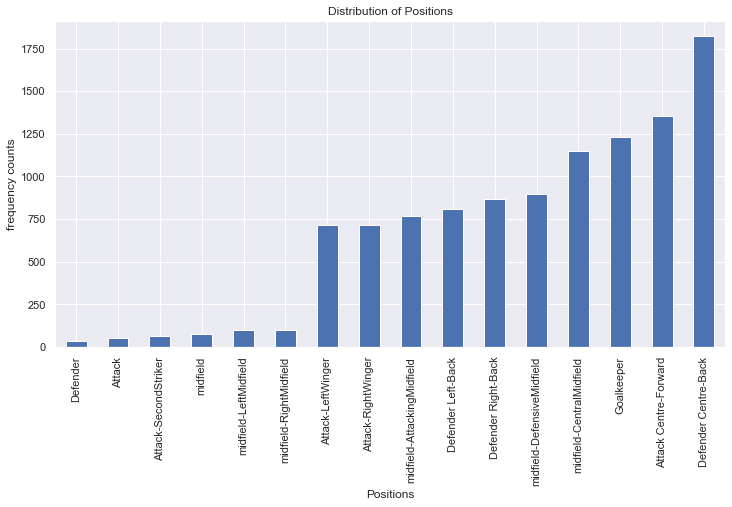

In [14]:
# Visualization of the positions distributions
sns.set(rc={'figure.figsize':(12,6)})
df.position.value_counts().sort_values().plot.bar()
plt.xlabel('Positions')
plt.ylabel('frequency counts')
plt.title('Distribution of Positions')

In [15]:
#unique encoded values for position encoded variable
df.position_encoded.unique()

array([1, 2, 3, 4], dtype=int64)

In [16]:
# Number of Players in an encoded position
df.position_encoded.value_counts().sort_values()

1    1229
4    2902
3    3095
2    3528
Name: position_encoded, dtype: int64

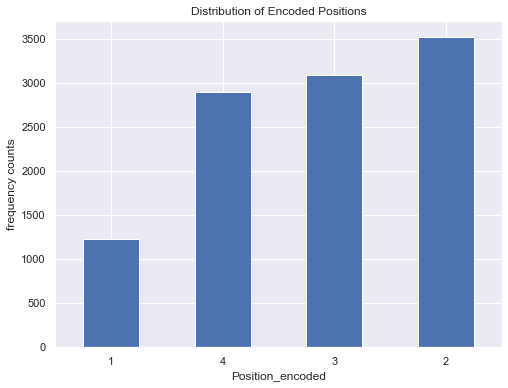

In [17]:
#VISUALIZATION OF POSITION ENCODED[COUNTS]
sns.set(rc={'figure.figsize':(8,6)})
df.position_encoded.value_counts().sort_values().plot.bar()
plt.xlabel('Position_encoded')
plt.ylabel('frequency counts')
plt.title('Distribution of Encoded Positions')
plt.xticks(rotation=0);

In [18]:
# value counts on wingers
df.winger.value_counts().sort_values()

1    3307
0    7447
Name: winger, dtype: int64

0    69.248652
1    30.751348
Name: winger, dtype: float64


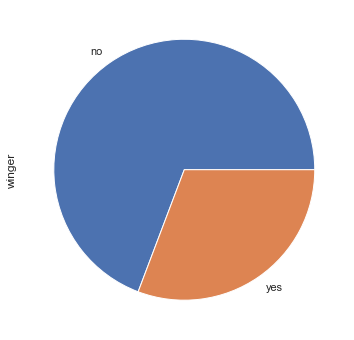

In [19]:
# VISUALIZATION OF WINGER VALUE COUNTS
wing_counts=df.winger.value_counts(normalize=True)*100
print(wing_counts)
wing_counts.plot.pie(labels = ['no', 'yes']);


In [20]:
left_wingers=(714/3307)*100
right_wingers=(717/3307)*100
print('percentage of left wingers :',left_wingers)
print('percentage of right wingers:',right_wingers)


percentage of left wingers : 21.59056546719081
percentage of right wingers: 21.681282128817656


Text(0.5, 1.0, 'Teams vrs Goals')

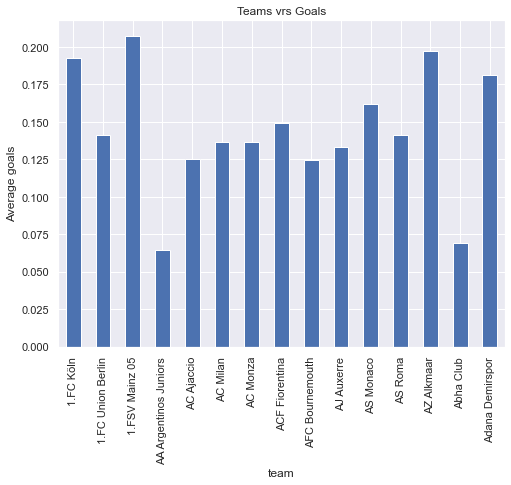

In [21]:
team_goals=df.groupby('team').aggregate({'goals':'mean'})
team_goals.head(15).plot(kind = 'bar', legend = None)
# label the axis and title
plt.ylabel('Average goals')
plt.title('Teams vrs Goals')

In [22]:
# maximum average goals scored by a team
team_goals.max()

goals    0.498999
dtype: float64

In [23]:
# minimum average goals scored by a team
team_goals.min()

goals    0.036735
dtype: float64

Text(0.5, 1.0, 'Teams vrs Games Injured')

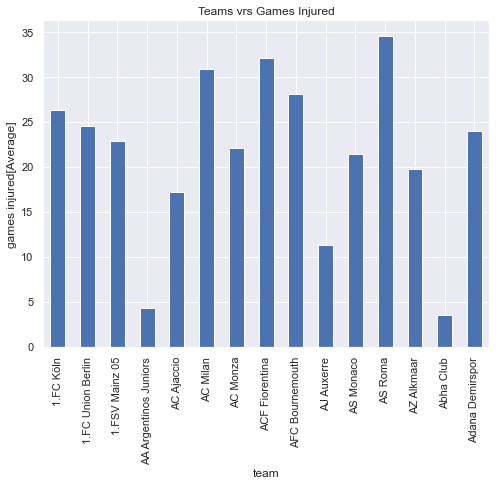

In [24]:
team_inj=df.groupby('team').aggregate({'games_injured':'mean'})
team_inj.head(15).plot(kind = 'bar', legend = None)
# label the axis and title
plt.ylabel('games injured[Average]')
plt.title('Teams vrs Games Injured')

Text(0.5, 1.0, 'Position vrs goals')

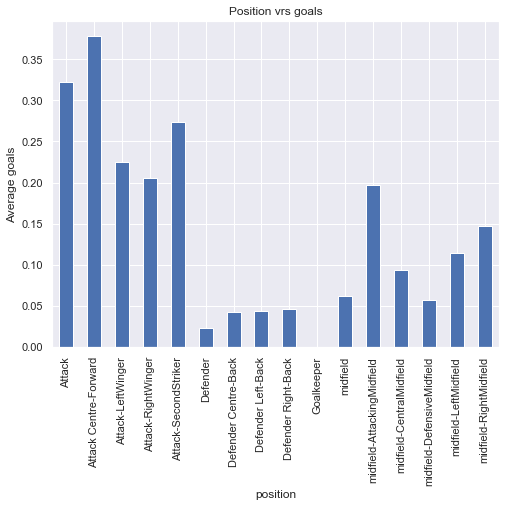

In [25]:
# Position Vrs Goals
df.groupby('position').aggregate({'goals':'mean'}).plot(kind = 'bar', legend = None)
# label the axis and title
plt.ylabel('Average goals')
plt.title('Position vrs goals')

The "Attack Center-Foward" averagely scores more goals than any other position

Text(0.5, 1.0, 'Position vrs minutes_Played')

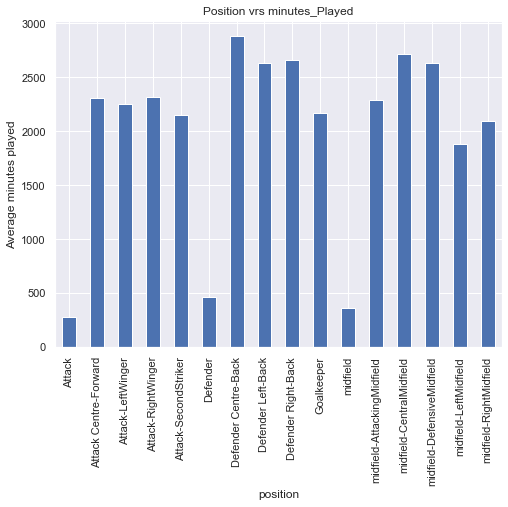

In [26]:
# Position Vrs Minutes Played
df.groupby('position').aggregate({'minutes_played':'mean'}).plot(kind = 'bar', legend = None)
# label the axis and title
plt.ylabel('Average minutes played')
plt.title('Position vrs minutes_Played')

The "Defender Center-Back" averagely plays more minutes than any other position

Text(0.5, 1.0, 'Age vrs appearance')

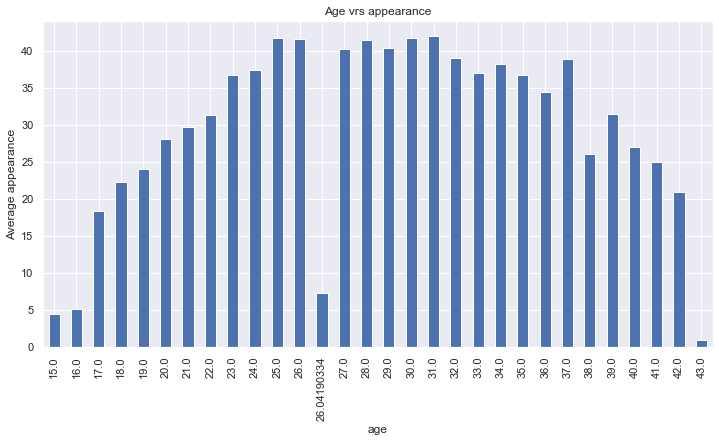

In [27]:
# Age Vrs Appearance
sns.set(rc={'figure.figsize':(12,6)})
df.groupby('age').aggregate({'appearance':'mean'}).plot(kind = 'bar', legend = None)
# label the axis and title
plt.ylabel('Average appearance')
plt.title('Age vrs appearance')

In [28]:
# maximum  average goals (per 90 minutes basis) from the dataset
df.goals.max()

11.25

In [29]:
# maximum average assists  (per 90 minutes basis) from the dataset
df.assists.max()

4.0

In [30]:
# Maximum minutes played
df['minutes_played'].max()

9510

In [31]:
# Players with the maximum goals[per 90 minutes basis]
df[(df['goals'] == 11.25)  ]



,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
9239,/rakan-al-dosari/profil/spieler/998314,Al-Raed SFC,Rakan Al-Dosari,Attack,181.240353,21.0,1,11.25,0.0,0.0,...,0.0,0.0,8,0,0,0,50000,50000,4,0


In [32]:
# Players with the maximum assists[per 90 minutes basis]
df[(df['assists'] == 4.0)  ]


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
8387,/riki-harakawa/profil/spieler/212115,Cerezo Osaka,Riki Harakawa,midfield-CentralMidfield,175.0,29.0,1,0.0,4.0,0.0,...,0.0,0.0,90,268,27,0,700000,775000,3,0


In [33]:
# Player with the highest minutes played
df[(df['minutes_played'] == 9510)  ]


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1550,/rui-patricio/profil/spieler/45026,AS Roma,Rui Patrício,Goalkeeper,190.0,35.0,105,0.0,0.0,0.07571,...,1.003155,0.397476,9510,75,9,8,5000000,20000000,1,0


In [34]:
# Attack-RightWing Players with their ages  appearances and goals greater than  22 ,50, and 0.2 reapectively 
d = df[(df['position'] == 'Attack-RightWinger') & (df['age'] >22) & (df['appearance']>50) & (df['goals']>0.2) ]
d.head(10)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
27,/antony/profil/spieler/602105,Manchester United,Antony,Attack-RightWinger,172.0,23.0,80,0.335252,0.228581,0.182865,...,0.0,0.0,5906,196,22,5,70000000,75000000,4,1
50,/jarrod-bowen/profil/spieler/314875,West Ham United,Jarrod Bowen,Attack-RightWinger,182.0,26.0,105,0.334733,0.237552,0.118776,...,0.0,0.0,8335,2,0,1,38000000,42000000,4,1
77,/tete/profil/spieler/371256,Leicester City,Tetê,Attack-RightWinger,175.0,23.0,72,0.381016,0.240642,0.160428,...,0.0,0.0,4488,0,0,4,25000000,28000000,4,1
125,/pablo-sarabia/profil/spieler/74230,Wolverhampton Wanderers,Pablo Sarabia,Attack-RightWinger,174.0,31.0,79,0.453152,0.197023,0.256130,...,0.0,0.0,4568,93,18,11,16000000,40000000,4,1
316,/harry-wilson/profil/spieler/279455,Fulham FC,Harry Wilson,Attack-RightWinger,173.0,26.0,76,0.251799,0.467626,0.143885,...,0.0,0.0,5004,152,28,1,13000000,25000000,4,1
369,/bryan-mbeumo/profil/spieler/413039,Brentford FC,Bryan Mbeumo,Attack-RightWinger,171.0,23.0,77,0.255298,0.225263,0.135158,...,0.0,0.0,5993,6,1,0,28000000,28000000,4,1
399,/mohamed-salah/profil/spieler/148455,Liverpool FC,Mohamed Salah,Attack-RightWinger,175.0,30.0,102,0.660253,0.346362,0.032471,...,0.0,0.0,8315,137,15,22,70000000,150000000,4,1
427,/miguel-almiron/profil/spieler/272999,Newcastle United,Miguel Almirón,Attack-RightWinger,174.0,29.0,73,0.230032,0.076677,0.076677,...,0.0,0.0,4695,177,19,2,35000000,35000000,4,1
452,/riyad-mahrez/profil/spieler/171424,Manchester City,Riyad Mahrez,Attack-RightWinger,179.0,32.0,94,0.585098,0.330055,0.045008,...,0.0,0.0,5999,23,1,20,30000000,60000000,4,1
475,/reiss-nelson/profil/spieler/340325,Arsenal FC,Reiss Nelson,Attack-RightWinger,175.0,23.0,51,0.291262,0.416089,0.083218,...,0.0,0.0,2163,357,64,4,7000000,17000000,4,1


In [35]:
#Goal keepers with their ages  and appearances greater than or equal to 30, and goals conceded less than or equal to 0.2 reapectively 
d = df[(df['position'] == 'Goalkeeper') & (df['age'] >= 30) & (df['appearance']>=30) & (df['goals conceded']<=2.0) ]
d.head(10)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
32,/alphonse-areola/profil/spieler/120629,West Ham United,Alphonse Areola,Goalkeeper,195.0,30.0,41,0.0,0.0,0.000000,...,0.898502,0.449251,3606,34,4,16,8000000,17500000,1,0
33,/lukasz-fabianski/profil/spieler/29692,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38.0,75,0.0,0.0,0.040767,...,1.331723,0.271780,6623,554,99,4,1000000,9000000,1,0
56,/alex-smithies/profil/spieler/33754,Leicester City,Alex Smithies,Goalkeeper,189.0,33.0,31,0.0,0.0,0.064516,...,1.483871,0.161290,2790,89,14,0,600000,3500000,1,0
81,/emiliano-martinez/profil/spieler/111873,Aston Villa,Emiliano Martínez,Goalkeeper,195.0,30.0,74,0.0,0.0,0.150915,...,1.207317,0.329268,6560,9,1,8,28000000,35000000,1,0
104,/jose-sa/profil/spieler/249994,Wolverhampton Wanderers,José Sá,Goalkeeper,192.0,30.0,76,0.0,0.0,0.066225,...,1.284768,0.304636,6795,151,5,6,18000000,18000000,1,0
213,/keylor-navas/profil/spieler/79422,Nottingham Forest,Keylor Navas,Goalkeeper,185.0,36.0,45,0.0,0.0,0.044798,...,1.276755,0.291190,4018,161,28,26,5000000,20000000,1,0
271,/sam-johnstone/profil/spieler/110864,Crystal Palace,Sam Johnstone,Goalkeeper,193.0,30.0,47,0.0,0.0,0.106383,...,0.914894,0.425532,4230,74,22,6,4000000,12000000,1,0
272,/vicente-guaita/profil/spieler/64399,Crystal Palace,Vicente Guaita,Goalkeeper,190.0,36.0,58,0.0,0.0,0.052174,...,1.200000,0.313043,5175,182,34,0,1500000,10000000,1,0
296,/bernd-leno/profil/spieler/72476,Fulham FC,Bernd Leno,Goalkeeper,190.0,31.0,45,0.0,0.0,0.066667,...,1.444444,0.244444,4050,126,15,5,10000000,35000000,1,0


In [36]:
# Central-Midfield Players with their ages  appearances and assists greater than or equal to 28 ,50, and 0.2 reapectively 
d = df[(df['position'] == 'midfield-CentralMidfield') & (df['age'] >= 28) & (df['appearance']>=50) & (df['assists']>=0.2) ]
d

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
16,/christian-eriksen/profil/spieler/69633,Manchester United,Christian Eriksen,midfield-CentralMidfield,182.0,31.0,55,0.067214,0.313667,0.089619,...,0.0,0.0,4017,0,0,10,25000000,100000000,3,0
18,/fred/profil/spieler/191614,Manchester United,Fred,midfield-CentralMidfield,169.0,30.0,92,0.184843,0.221811,0.332717,...,0.0,0.0,4869,45,10,11,20000000,50000000,3,0
176,/pascal-gross/profil/spieler/82873,Brighton &amp; Hove Albion,Pascal Groß,midfield-CentralMidfield,181.0,31.0,77,0.173132,0.201988,0.100994,...,0.0,0.0,6238,149,20,3,8000000,12000000,3,0
336,/joe-rothwell/profil/spieler/183293,AFC Bournemouth,Joe Rothwell,midfield-CentralMidfield,185.0,28.0,65,0.060620,0.222272,0.181859,...,0.0,0.0,4454,28,5,3,3500000,3500000,3,0
577,/yannick-gerhardt/profil/spieler/119277,VfL Wolfsburg,Yannick Gerhardt,midfield-CentralMidfield,184.0,29.0,64,0.165964,0.260801,0.118546,...,0.0,0.0,3796,320,39,4,7000000,12000000,3,0
1096,/dani-parejo/profil/spieler/59561,Villarreal CF,Dani Parejo,midfield-CentralMidfield,182.0,34.0,96,0.070570,0.223471,0.141140,...,0.0,0.0,7652,82,18,4,6000000,35000000,3,0
1520,/luka-modric/profil/spieler/27992,Real Madrid,Luka Modric,midfield-CentralMidfield,172.0,37.0,97,0.122783,0.245566,0.190996,...,0.0,0.0,6597,154,32,38,10000000,55000000,3,0
1592,/sergej-milinkovic-savic/profil/spieler/266302,SS Lazio,Sergej Milinkovic-Savic,midfield-CentralMidfield,191.0,28.0,94,0.264423,0.240385,0.204327,...,0.0,0.0,7488,148,28,6,60000000,90000000,3,0
1593,/luis-alberto/profil/spieler/128220,SS Lazio,Luis Alberto,midfield-CentralMidfield,183.0,30.0,88,0.176644,0.294406,0.161923,...,0.0,0.0,6114,106,28,3,18000000,55000000,3,0
1619,/giacomo-bonaventura/profil/spieler/57280,ACF Fiorentina,Giacomo Bonaventura,midfield-CentralMidfield,180.0,33.0,84,0.171221,0.233483,0.202352,...,0.0,0.0,5782,535,87,2,2500000,24000000,3,0


In [37]:
# Attacking- Midfield Players with their ages,minutes played and assists   greater than 25, 200, and  0.3 respectively.
d = df[(df['position'] == 'midfield-AttackingMidfield') & (df['age'] > 25) & (df['minutes_played']>200) & (df['assists']>0.3) ]
d

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
75,/james-maddison/profil/spieler/294057,Leicester City,James Maddison,midfield-AttackingMidfield,175.0,26.0,85,0.406255,0.304691,0.275673,...,0.0,0.0,6203,246,30,2,55000000,60000000,3,0
365,/saman-ghoddos/profil/spieler/204294,Brentford FC,Saman Ghoddos,midfield-AttackingMidfield,175.0,29.0,41,0.071942,0.359712,0.215827,...,0.0,0.0,1251,86,13,1,2200000,5000000,3,0
447,/kevin-de-bruyne/profil/spieler/88755,Manchester City,Kevin De Bruyne,midfield-AttackingMidfield,181.0,31.0,94,0.371689,0.576759,0.076901,...,0.0,0.0,7022,256,47,26,80000000,150000000,3,0
553,/lars-stindl/profil/spieler/48298,Borussia Mönchengladbach,Lars Stindl,midfield-AttackingMidfield,181.0,34.0,60,0.337802,0.361930,0.482574,...,0.0,0.0,3730,670,71,2,2500000,18000000,3,0
849,/philipp-forster/profil/spieler/179635,VfL Bochum,Philipp Förster,midfield-AttackingMidfield,188.0,28.0,50,0.203697,0.339495,0.305545,...,0.0,0.0,2651,170,15,1,2500000,3500000,3,0
964,/marco-reus/profil/spieler/35207,Borussia Dortmund,Marco Reus,midfield-AttackingMidfield,180.0,33.0,72,0.359931,0.445629,0.137117,...,0.0,0.0,5251,395,37,10,9000000,50000000,3,0
1678,/aleksey-miranchuk/profil/spieler/255450,Torino FC,Aleksey Miranchuk,midfield-AttackingMidfield,182.0,27.0,56,0.167858,0.335717,0.000000,...,0.0,0.0,3217,209,36,6,12000000,18000000,3,0
2183,/dimitri-payet/profil/spieler/37647,Olympique Marseille,Dimitri Payet,midfield-AttackingMidfield,173.0,36.0,73,0.383713,0.306971,0.134300,...,0.0,0.0,4691,259,38,0,2000000,30000000,3,0
2456,/youssouf-mchangama/profil/spieler/167472,AJ Auxerre,Youssouf M'Changama,midfield-AttackingMidfield,175.0,32.0,64,0.185908,0.351159,0.103282,...,0.0,0.0,4357,0,0,0,1000000,1500000,3,0
2561,/remy-cabella/profil/spieler/113707,LOSC Lille,Rémy Cabella,midfield-AttackingMidfield,172.0,33.0,58,0.217535,0.355966,0.098879,...,0.0,0.0,4551,630,80,1,5000000,14000000,3,0


In [38]:
# Defender Center-back Players with their ages less than 30, yellow card  and red cards   greater than 0.3 and 0.1 respectively.
d = df[(df['position'] == 'Defender Centre-Back') & (df['age'] < 30) & (df['yellow cards']>0.3) & (df['red cards']>0.1) ]
d

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3508,/lucas-halter/profil/spieler/468302,Goiás Esporte Clube,Lucas Halter,Defender Centre-Back,188.0,23.0,7,0.154905,0.0,0.464716,...,0.0,0.0,581,0,0,1,3000000,5000000,2,0
5085,/alexis-duarte/profil/spieler/491587,Spartak Moscow,Alexis Duarte,Defender Centre-Back,185.0,23.0,8,0.000000,0.0,0.326087,...,0.0,0.0,552,0,0,2,3000000,4000000,2,0
8132,/patricio-ostachuk/profil/spieler/842911,CA Independiente,Patricio Ostachuk,Defender Centre-Back,183.0,23.0,6,0.000000,0.0,0.379747,...,0.0,0.0,237,9,0,0,100000,125000,2,0
8214,/nicolas-valentini/profil/spieler/860992,CA Boca Juniors,Nicolás Valentini,Defender Centre-Back,187.0,22.0,9,0.000000,0.0,0.324324,...,0.0,0.0,555,0,0,1,750000,750000,2,0


In [39]:
# Correlatiuon of features
correlation=df.corr()
correlation

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
height,1.000000,0.063652,0.060641,-0.055962,-0.202441,-0.037974,-0.005112,-0.005693,0.333092,0.044366,0.132887,0.059392,0.054902,0.013976,0.040535,0.036776,-0.378333,-0.381728
age,0.063652,1.000000,0.139846,-0.034805,-0.024156,0.007085,0.015529,0.003074,0.083343,0.039064,0.169020,0.324267,0.343029,0.363478,-0.050156,0.123468,-0.107469,-0.047808
appearance,0.060641,0.139846,1.000000,0.131469,0.157186,-0.023092,-0.007436,-0.024514,-0.101384,-0.032515,0.945365,0.127369,0.147528,0.222139,0.419656,0.418394,0.129357,0.038713
goals,-0.055962,-0.034805,0.131469,1.000000,0.218266,-0.012826,-0.013974,-0.013940,-0.158107,-0.025811,0.050863,0.037527,0.041696,0.099617,0.121574,0.129037,0.434600,-0.004581
assists,-0.202441,-0.024156,0.157186,0.218266,1.000000,-0.004430,0.019551,-0.013189,-0.180607,-0.029460,0.081136,0.039431,0.049383,0.091569,0.137415,0.145407,0.324714,0.177580
yellow cards,-0.037974,0.007085,-0.023092,-0.012826,-0.004430,1.000000,0.028739,-0.003007,-0.093675,-0.017122,-0.039652,0.011461,0.012892,-0.009052,-0.011766,-0.009772,0.077185,0.010097
second yellow cards,-0.005112,0.015529,-0.007436,-0.013974,0.019551,0.028739,1.000000,-0.002562,-0.045840,-0.006770,-0.010411,0.003772,0.007090,-0.015231,-0.013889,-0.014155,0.005766,-0.007259
red cards,-0.005693,0.003074,-0.024514,-0.013940,-0.013189,-0.003007,-0.002562,1.000000,-0.004584,-0.001778,-0.024402,-0.003650,-0.004764,-0.007886,-0.010171,-0.007257,0.004614,-0.007026
goals conceded,0.333092,0.083343,-0.101384,-0.158107,-0.180607,-0.093675,-0.045840,-0.004584,1.000000,0.067466,-0.004267,-0.030926,-0.042140,-0.011520,-0.063529,-0.061183,-0.517020,-0.198351
clean sheets,0.044366,0.039064,-0.032515,-0.025811,-0.029460,-0.017122,-0.006770,-0.001778,0.067466,1.000000,-0.020190,0.001275,0.005611,0.002996,-0.011684,-0.008302,-0.084334,-0.032354


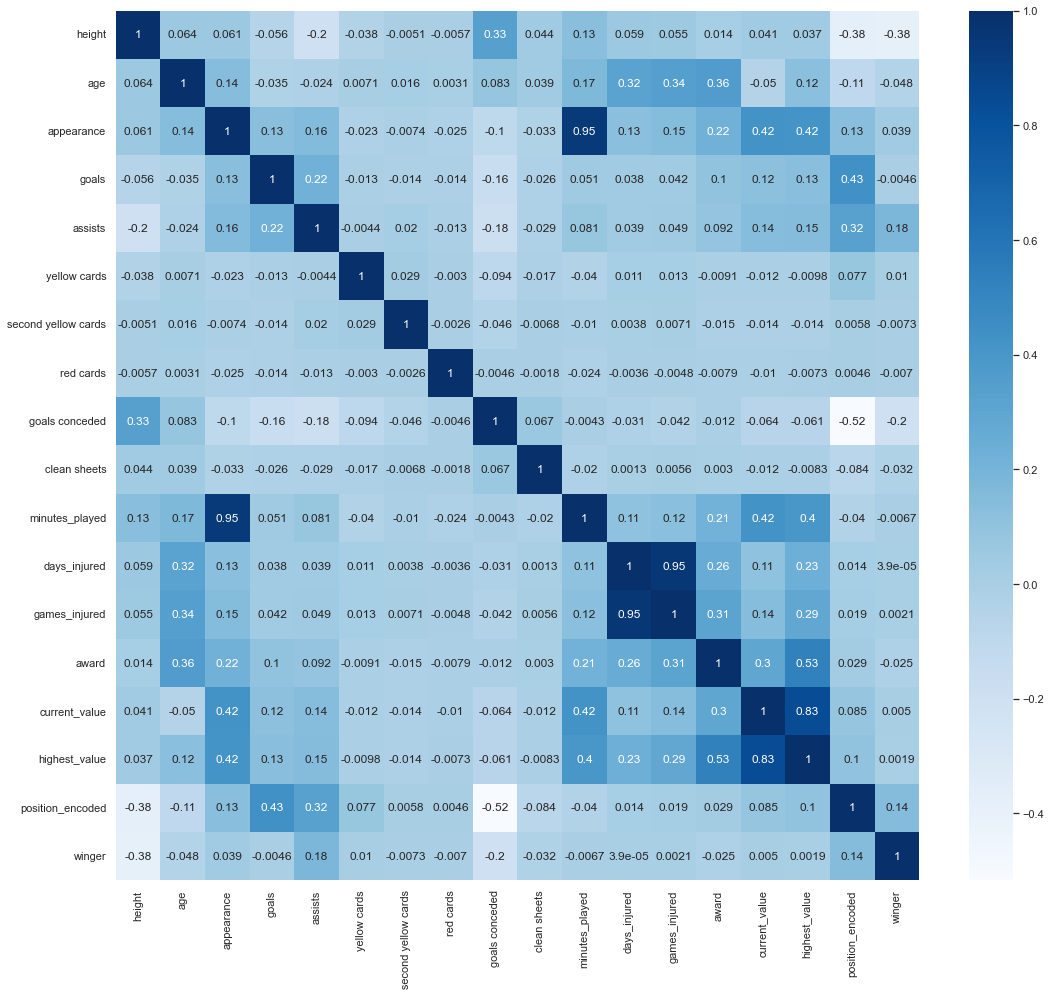

In [40]:
sns.set(rc={'figure.figsize':(18,16)})
sns.heatmap(correlation, cmap = 'Blues', annot= True);

Following Exploratory data Analysis i pinpointed a selection  of variables demonstrating a strong correlation with 
the target variable 'current_value'. These variables comprise 'highest_value','appearances','minutes played','award',
'assists','goals',and Position_encoded.



In [41]:
# dropping non-numeric features
cols = ['player', 'team', 'name', 'position', 'height', 
                     'age', 'yellow cards', 'second yellow cards', 'red cards',
                   'goals conceded', 'clean sheets','days_injured', 'games_injured', 'winger']
df.drop(cols, axis = 1, inplace = True)
df.head()

,appearance,goals,assists,minutes_played,award,current_value,highest_value,position_encoded
0,104,0.000000,0.000000,9390,13,15000000,70000000,1
1,15,0.000000,0.000000,1304,1,1500000,22000000,1
2,4,0.000000,0.000000,292,4,600000,6000000,1
3,82,0.028090,0.056180,6408,9,50000000,50000000,2
4,63,0.017889,0.017889,5031,21,40000000,80000000,2


# Building the model

In [42]:
X = df.drop(columns=['current_value'])
y = df['current_value']
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: (10754, 7) 
y shape: (10754,)


In [43]:
# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9678, 7)
y_train shape: (9678,)
X_test shape: (1076, 7)
y_test shape: (1076,)


In [44]:
# Create a linear regression model
linear_model = Ridge()

In [45]:
# Define the hyperparameters to tune
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strength of the hyperparameter

In [46]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(linear_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.05184e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.05839e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.95021e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.96343e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarn

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [47]:
# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_alpha

100

In [48]:
# Train the model with the best hyperparameters
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)


Ridge(alpha=100)

In [49]:
# Make predictions on the validation set
y_pred = final_model.predict(X_test)
y_pred

array([ -106007.99425228, 88534580.97743446,  6605183.82103717, ...,
        9970350.98019323,  -210634.18091243,  1078458.9789135 ])

In [50]:
# Round the Predicted Validation Set
rounded_y_pred=np.round(y_pred,decimals=0)
rounded_y_pred

array([ -106008., 88534581.,  6605184., ...,  9970351.,  -210634.,
        1078459.])

In [51]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Validation Set: {mse}')

Mean Squared Error on Validation Set: 28431501582600.9


In [52]:
mae = round(mean_absolute_error(y_test,y_pred),0)
mae

2229265.0

In [53]:
feature_names=X.columns

In [54]:
# Calculate permutation importance
perm_importance = permutation_importance(final_model, X_test, y_test, n_repeats=30, random_state=42)

# Display feature importances
for feature, importance in zip(feature_names, perm_importance.importances_mean):
    print(f"{feature}: {importance}")


appearance: 0.034332669407484404
goals: 0.0009919244821649964
assists: 0.0005959223865099617
minutes_played: 0.10845209109558065
award: 0.04699410509964441
highest_value: 1.502675220406531
position_encoded: 0.000831269284405319


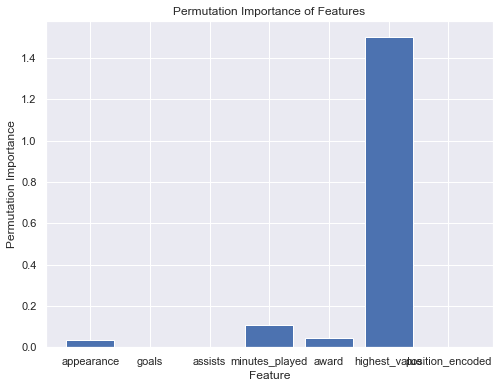

In [55]:
# Visualize permutation importance
sns.set(rc={'figure.figsize':(8,6)})
plt.bar(feature_names, perm_importance.importances_mean)
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.show()

highest_value has the highest permutation importance which means its greatly affect the models performance and it also
considered as the most important feature

goals, assists and Position_encoded did  not have a very high correlation with the target variable. Due to this
It does not greatly affect the model's prediction


# Model Deployment

In [56]:
import gradio as gr
def predicta(appearance,goals,assists,minutes_played,award,highest_value,position_encoded):
    # make data frame
    df = pd.DataFrame({
        'appearance':[appearance],
        'goals':[goals],
        'assists':[assists],
        'minutes_played':[minutes_played],
        'award':[award],
        'highest_value':[highest_value],
        'position_encoded':[position_encoded]
    })
    # make prediction
    y_pred = list(final_model.predict(df))
    rounded_y_pred=np.round(y_pred,decimals=0)
    return rounded_y_pred[0]


# give the function an interface
app = gr.Interface(
    title= "Market Value Prediction",
    fn=predicta,
    inputs=["number","number", "number", "number", "number", "number", "number"],
    outputs=["number"]
)
app.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
